#📌 Extracción

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Gaby46Pe/challenge2-data-science-LATAM-gap/blob/main/TelecomX_LATAM.ipynb)

In [252]:
#Cargamos el json en un DataFrame
import pandas as pd
import numpy as np
datos=pd.read_json('TelecomX_Data.json')
df = pd.DataFrame(datos)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [253]:
df.shape

(7267, 6)

In [254]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


#🔧 Transformación

In [256]:
# Normalizamos el DataFrame 'datos' aplanando todas las columnas que contienen diccionarios anidados.
# Convertimos el DataFrame a una lista de registros y con json_normalize expandimos los diccionarios en nuevas columnas.
# Usamos 'sep='_' para que los nombres de las columnas anidadas se separen con un guion bajo en lugar de un punto.
df_normalized = pd.json_normalize(datos.to_dict('records'), sep='_')
df_normalized.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [257]:
# Uso .unique()
# Para ver los valores únicos en las columnas del DataFrame
for col in df_normalized.columns:
    print(f"\nValores únicos para la columna '{col}':")
    display(df_normalized[col].unique())


Valores únicos para la columna 'customerID':


array(['0002-ORFBO', '0003-MKNFE', '0004-TLHLJ', ..., '9992-UJOEL',
       '9993-LHIEB', '9995-HOTOH'], shape=(7267,), dtype=object)


Valores únicos para la columna 'Churn':


array(['No', 'Yes', ''], dtype=object)


Valores únicos para la columna 'customer_gender':


array(['Female', 'Male'], dtype=object)


Valores únicos para la columna 'customer_SeniorCitizen':


array([0, 1])


Valores únicos para la columna 'customer_Partner':


array(['Yes', 'No'], dtype=object)


Valores únicos para la columna 'customer_Dependents':


array(['Yes', 'No'], dtype=object)


Valores únicos para la columna 'customer_tenure':


array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])


Valores únicos para la columna 'phone_PhoneService':


array(['Yes', 'No'], dtype=object)


Valores únicos para la columna 'phone_MultipleLines':


array(['No', 'Yes', 'No phone service'], dtype=object)


Valores únicos para la columna 'internet_InternetService':


array(['DSL', 'Fiber optic', 'No'], dtype=object)


Valores únicos para la columna 'internet_OnlineSecurity':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos para la columna 'internet_OnlineBackup':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos para la columna 'internet_DeviceProtection':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos para la columna 'internet_TechSupport':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos para la columna 'internet_StreamingTV':


array(['Yes', 'No', 'No internet service'], dtype=object)


Valores únicos para la columna 'internet_StreamingMovies':


array(['No', 'Yes', 'No internet service'], dtype=object)


Valores únicos para la columna 'account_Contract':


array(['One year', 'Month-to-month', 'Two year'], dtype=object)


Valores únicos para la columna 'account_PaperlessBilling':


array(['Yes', 'No'], dtype=object)


Valores únicos para la columna 'account_PaymentMethod':


array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)


Valores únicos para la columna 'account_Charges_Monthly':


array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85], shape=(1585,))


Valores únicos para la columna 'account_Charges_Total':


array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      shape=(6531,), dtype=object)

In [258]:
# Uso .unique()
# Para ver los valores únicos en la columna de Churn
display(df_normalized['Churn'].unique())

# Para ver los valores únicos en el servicio de Internet
display(df_normalized['internet_InternetService'].unique())

# Para ver los valores únicos en el género del cliente
display(df_normalized['customer_gender'].unique())

array(['No', 'Yes', ''], dtype=object)

array(['DSL', 'Fiber optic', 'No'], dtype=object)

array(['Female', 'Male'], dtype=object)

In [259]:
import numpy as np

# Reemplazar los valores vacíos en la columna 'Churn' con NaN
df_normalized['Churn'] = df_normalized['Churn'].replace('', np.nan)

# Verificar los valores únicos de nuevo para confirmar el cambio
display(df_normalized['Churn'].unique())

array(['No', 'Yes', nan], dtype=object)

In [260]:
# Normalizamos los nombres de las columnas del DF, convirtiéndolos a minúsculas y reemplazando
# espacios por guiones bajos
df_normalized.columns = df_normalized.columns.str.lower().str.replace(' ', '_')
df_normalized.head()

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [261]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [262]:
df_normalized.dtypes

customerid                    object
churn                         object
customer_gender               object
customer_seniorcitizen         int64
customer_partner              object
customer_dependents           object
customer_tenure                int64
phone_phoneservice            object
phone_multiplelines           object
internet_internetservice      object
internet_onlinesecurity       object
internet_onlinebackup         object
internet_deviceprotection     object
internet_techsupport          object
internet_streamingtv          object
internet_streamingmovies      object
account_contract              object
account_paperlessbilling      object
account_paymentmethod         object
account_charges_monthly      float64
account_charges_total         object
dtype: object

In [263]:
# Convertir la columna account_charges_total a tipo numérico (float)
# Con 'errors="coerce"' convertirá cualquier valor que no pueda ser transformado a NaN
df_normalized['account_charges_total'] = pd.to_numeric(df_normalized['account_charges_total'], errors='coerce')
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-null   objec

In [264]:
# Reemplazar cadenas vacías o espacios en blanco con NaN en 'account_charges_total'
df_normalized['account_charges_total'] = df_normalized['account_charges_total'].replace(r'^\s*$', np.nan, regex=True)
df_normalized['account_charges_total']

0        593.30
1        542.40
2        280.85
3       1237.85
4        267.40
         ...   
7262     742.90
7263    1873.70
7264      92.75
7265    4627.65
7266    3707.60
Name: account_charges_total, Length: 7267, dtype: float64

In [265]:
# Filtrar filas donde la columna 'churn' es NaN, y mostrar las primeras filas de ese subconjunto
# Además, contamos cuántas filas tienen NaN en esa columna
df_churn_nan = df_normalized[df_normalized['churn'].isna()]
display(df_churn_nan.head())
print(f"Número de filas con NaN en la columna 'churn': {len(df_churn_nan)}")

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
30,0047-ZHDTW,NaN,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,NaN,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,NaN,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,NaN,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,NaN,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45


Número de filas con NaN en la columna 'churn': 224


In [266]:
# Calcular el porcentaje de NaNs en la columna 'churn'
nan_ratio = df_normalized['churn'].isna().mean()
print(f"El porcentaje de NaNs en la columna 'churn' es: {nan_ratio:.2%}")

El porcentaje de NaNs en la columna 'churn' es: 3.08%


In [267]:
# Revisar si NaNs se concentran en subgrupos 
df_normalized[df_normalized['churn'].isna()].describe(include='all')

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
count,224,0,224,224.000000,224,224,224.000000,224,224,224,...,224,224,224,224,224,224,224,224,224.000000,224.000000
unique,224,0,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,NaN
top,0047-ZHDTW,NaN,Male,NaN,Yes,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,NaN,120,NaN,116,153,NaN,199,105,102,...,94,100,109,86,85,130,140,80,NaN,NaN
mean,NaN,NaN,NaN,0.178571,NaN,NaN,31.571429,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.412277,2196.933705
std,NaN,NaN,NaN,0.383851,NaN,NaN,24.998552,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.388712,2329.961954
min,NaN,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.750000,18.900000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,7.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.425000,351.037500
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.100000,1163.175000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,56.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.412500,3562.862500


In [268]:
# Analizar concentración de NaNs por subgrupos clave
print("=== Proporción de NaN en 'churn' por variable categórica ===\n")

categorical_cols = ['customer_gender', 'internet_internetservice', 'customer_partner', 'customer_seniorcitizen']

for col in categorical_cols:
    if col in df_normalized.columns:
        nan_by_group = df_normalized.groupby(col, dropna=False)['churn'].apply(lambda x: x.isna().mean())
        print(f"\n{col}:")
        print(nan_by_group)
        
print("\n=== Resumen: Proporción total de NaN ===")
print(f"Total NaN en 'churn': {df_normalized['churn'].isna().sum()} filas")
print(f"Proporción: {nan_ratio:.4f} ({nan_ratio*100:.2f}%)")

=== Proporción de NaN en 'churn' por variable categórica ===


customer_gender:
customer_gender
Female    0.028953
Male      0.032653
Name: churn, dtype: float64

internet_internetservice:
internet_internetservice
DSL            0.026929
Fiber optic    0.031895
No             0.034788
Name: churn, dtype: float64

customer_partner:
customer_partner
No     0.028808
Yes    0.032973
Name: churn, dtype: float64

customer_seniorcitizen:
customer_seniorcitizen
0    0.030238
1    0.033841
Name: churn, dtype: float64

=== Resumen: Proporción total de NaN ===
Total NaN en 'churn': 224 filas
Proporción: 0.0308 (3.08%)


In [269]:
# Eliminar filas con NaN en la columna 'churn' por ser 3.08% del total
# una proporción manejable para este análisis
df_normalized.dropna(subset=['churn'], inplace=True)
print(f"Filas después de eliminar NaN: {df_normalized.shape[0]}")

Filas después de eliminar NaN: 7043


In [270]:
df_normalized.shape

(7043, 21)

In [271]:
df_normalized.columns

Index(['customerid', 'churn', 'customer_gender', 'customer_seniorcitizen',
       'customer_partner', 'customer_dependents', 'customer_tenure',
       'phone_phoneservice', 'phone_multiplelines', 'internet_internetservice',
       'internet_onlinesecurity', 'internet_onlinebackup',
       'internet_deviceprotection', 'internet_techsupport',
       'internet_streamingtv', 'internet_streamingmovies', 'account_contract',
       'account_paperlessbilling', 'account_paymentmethod',
       'account_charges_monthly', 'account_charges_total'],
      dtype='object')

In [272]:
# Creamos la columna 'cuentas_diarias' y para calcular la facturación diaria, tomamos la facturación
# mensual y la dividimos por 30 (promedio de días por mes)
df_normalized['cuentas_diarias'] = df_normalized['account_charges_monthly'] / 30
# Imprimimos las primeras filas
display(df_normalized.head())

,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,...,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [273]:
# Verificamos tipo de dato y existencia de la columna
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7043 non-null   object 
 1   churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_seniorcitizen     7043 non-null   int64  
 4   customer_partner           7043 non-null   object 
 5   customer_dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_phoneservice         7043 non-null   object 
 8   phone_multiplelines        7043 non-null   object 
 9   internet_internetservice   7043 non-null   object 
 10  internet_onlinesecurity    7043 non-null   object 
 11  internet_onlinebackup      7043 non-null   object 
 12  internet_deviceprotection  7043 non-null   object 
 13  internet_techsupport       7043 non-null   object 
 1

In [274]:
df_normalized.shape

(7043, 22)

In [275]:
# Confirmamos que no quedan valores NaN en la columna 'churn' después de la eliminación
nan_in_churn = df_normalized['churn'].isnull().sum()
print(f"Número de valores NaN en la columna 'churn': {nan_in_churn}")

Número de valores NaN en la columna 'churn': 0


In [276]:
df_normalized['customer_gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7262    Female
7263      Male
7264      Male
7265      Male
7266      Male
Name: customer_gender, Length: 7043, dtype: object

In [277]:
# Solo para 'customer_gender': Unificar a minúsculas, reemplazar 'female': 0 y 'male': 1
# Agregar .strip() - para eliminar espacios en blanco antes/después de los valores
df_normalized['customer_gender'] = df_normalized['customer_gender'].astype(str).str.strip().str.lower().replace({'female': 0, 'male': 1})
df_normalized[['customer_gender']].head()

C:\Users\gap20\AppData\Local\Temp\ipykernel_3672\1441581903.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized['customer_gender'] = df_normalized['customer_gender'].astype(str).str.strip().str.lower().replace({'female': 0, 'male': 1})


,customer_gender
0,0
1,1
2,1
3,1
4,0


In [278]:
# Lista de columnas binarias que se espera que contengan 'Yes'/'No' y que aún no son numéricas
# Excluimos 'customer_gender' porque ya fue tratada
# Excluimos columnas no binarias como IDs o categóricas con más de 2 valores

object_cols_current = df_normalized.select_dtypes(include='object').columns.tolist()

exclusion_list_for_yes_no = [
    'customerid',
    'customer_gender', # Ya procesada
    'internet_internetservice',
    'account_contract',
    'account_paymentmethod'
]

# Columnas a procesar para la normalización 'Yes'/'No'
cols_to_process_yes_no = [col for col in object_cols_current if col not in exclusion_list_for_yes_no]

print(f"Columnas 'object' identificadas para la normalización 'Yes'/'No': {cols_to_process_yes_no}\n")

for col in cols_to_process_yes_no:
    # Normalizar a minúsculas y eliminar espacios en blanco
    df_normalized[col] = df_normalized[col].astype(str).str.strip().str.lower()
    
    unique_vals = df_normalized[col].unique()
    print(f"'{col}'. Valores normalizados: {unique_vals}")

    # Mapear 'yes' a 1 y 'no' a 0. Otros valores se convertirán a NaN.
    if 'yes' in unique_vals or 'no' in unique_vals:
        df_normalized[col] = df_normalized[col].map({'yes': 1, 'no': 0}).astype('Int64')
        print(f"  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: {df_normalized[col].unique()}")
    else:
        print(f"  -> No se encontraron 'yes'/'no' para mapear en '{col}'. La columna se mantiene como string o con NaN si hubo problemas.")

print("\nNormalización de columnas binarias 'Yes'/'No' completada.")

Columnas 'object' identificadas para la normalización 'Yes'/'No': ['churn', 'customer_partner', 'customer_dependents', 'phone_phoneservice', 'phone_multiplelines', 'internet_onlinesecurity', 'internet_onlinebackup', 'internet_deviceprotection', 'internet_techsupport', 'internet_streamingtv', 'internet_streamingmovies', 'account_paperlessbilling']



'churn'. Valores normalizados: ['no' 'yes']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[0, 1]
Length: 2, dtype: Int64
'customer_partner'. Valores normalizados: ['yes' 'no']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
'customer_dependents'. Valores normalizados: ['yes' 'no']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
'phone_phoneservice'. Valores normalizados: ['yes' 'no']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[1, 0]
Length: 2, dtype: Int64
'phone_multiplelines'. Valores normalizados: ['no' 'yes' 'no phone service']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
'internet_onlinesecurity'. Valores normalizados: ['no' 'yes' 'no internet service']
  -> Mapeado 'yes': 1, 'no': 0. Nuevos valores: <IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
'internet_onlinebackup'. Valores normalizados: ['

In [279]:
df_normalized.dtypes

customerid                    object
churn                          Int64
customer_gender                int64
customer_seniorcitizen         int64
customer_partner               Int64
customer_dependents            Int64
customer_tenure                int64
phone_phoneservice             Int64
phone_multiplelines            Int64
internet_internetservice      object
internet_onlinesecurity        Int64
internet_onlinebackup          Int64
internet_deviceprotection      Int64
internet_techsupport           Int64
internet_streamingtv           Int64
internet_streamingmovies       Int64
account_contract              object
account_paperlessbilling       Int64
account_paymentmethod         object
account_charges_monthly      float64
account_charges_total        float64
cuentas_diarias              float64
dtype: object

#📊 Carga y análisis

In [280]:
# Estadísticas Descriptivas para Columnas Numéricas
# Calculamos métricas clave como la media, la mediana, la desviación estándar, el mínimo, el máximo y los cuartiles
# para todas las columnas numéricas en el DataFrame solo con 2 decimales
df_normalized.describe().round(2)

,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_paperlessbilling,account_charges_monthly,account_charges_total,cuentas_diarias
count,7043.0,7043.0,7043.00,7043.0,7043.0,7043.00,7043.0,6361.0,5517.0,5517.0,5517.0,5517.0,5517.0,5517.0,7043.0,7043.00,7032.00,7043.00
mean,0.27,0.5,0.16,0.48,0.3,32.37,0.9,0.47,0.37,0.44,0.44,0.37,0.49,0.5,0.59,64.76,2283.30,2.16
std,0.44,0.5,0.37,0.5,0.46,24.56,0.3,0.5,0.48,0.5,0.5,0.48,0.5,0.5,0.49,30.09,2266.77,1.00
min,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.25,18.80,0.61
25%,0.0,0.0,0.00,0.0,0.0,9.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.50,401.45,1.18
50%,0.0,1.0,0.00,0.0,0.0,29.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.35,1397.48,2.34
75%,1.0,1.0,0.00,1.0,1.0,55.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,89.85,3794.74,2.99
max,1.0,1.0,1.00,1.0,1.0,72.00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,118.75,8684.80,3.96


In [281]:
# Estadísticas Descriptivas para Columnas Categóricas
# Examinamos las columnas categóricas para entender la distribución de sus valores, incluyendo el conteo,
# el número de valores únicos, el valor más frecuente y su frecuencia.
display(df_normalized.describe(include='object'))

,customerid,internet_internetservice,account_contract,account_paymentmethod
count,7043,7043,7043,7043
unique,7043,3,3,4
top,0002-ORFBO,Fiber optic,Month-to-month,Electronic check
freq,1,3096,3875,2365


In [282]:
# Distribución de Frecuencias para Columnas Categóricas Clave
# Para obtener una visión más detallada, mostramos la distribución de frecuencias para cada columna
# lo que nos ayudará a identificar patrones y desequilibrios.

categorical_cols = df_normalized.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n--- Columna '{col.upper()}' ---")
    display(df_normalized[col].value_counts())
    print(f"Porcentaje de la distribución de '{col.upper()}':")
    display(df_normalized[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


--- Columna 'CUSTOMERID' ---


customerid
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64

Porcentaje de la distribución de 'CUSTOMERID':


customerid
0002-ORFBO    0.01%
0003-MKNFE    0.01%
0004-TLHLJ    0.01%
0011-IGKFF    0.01%
0013-EXCHZ    0.01%
              ...  
9987-LUTYD    0.01%
9992-RRAMN    0.01%
9992-UJOEL    0.01%
9993-LHIEB    0.01%
9995-HOTOH    0.01%
Name: proportion, Length: 7043, dtype: object


--- Columna 'INTERNET_INTERNETSERVICE' ---


internet_internetservice
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Porcentaje de la distribución de 'INTERNET_INTERNETSERVICE':


internet_internetservice
Fiber optic    43.96%
DSL            34.37%
No             21.67%
Name: proportion, dtype: object


--- Columna 'ACCOUNT_CONTRACT' ---


account_contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

Porcentaje de la distribución de 'ACCOUNT_CONTRACT':


account_contract
Month-to-month    55.02%
Two year          24.07%
One year          20.91%
Name: proportion, dtype: object


--- Columna 'ACCOUNT_PAYMENTMETHOD' ---


account_paymentmethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Porcentaje de la distribución de 'ACCOUNT_PAYMENTMETHOD':


account_paymentmethod
Electronic check             33.58%
Mailed check                 22.89%
Bank transfer (automatic)    21.92%
Credit card (automatic)      21.61%
Name: proportion, dtype: object

In [283]:
# Contar los resultados de 'churn'
churn_counts = df_normalized['churn'].value_counts()
display(churn_counts)
# Calcular los porcentajes de los resultados de 'churn'
churn_percentages = df_normalized['churn'].value_counts(normalize=True) * 100
churn_percentages.map('{:.2f}%'.format)

churn
0    5174
1    1869
Name: count, dtype: Int64

churn
0    73.46%
1    26.54%
Name: proportion, dtype: object

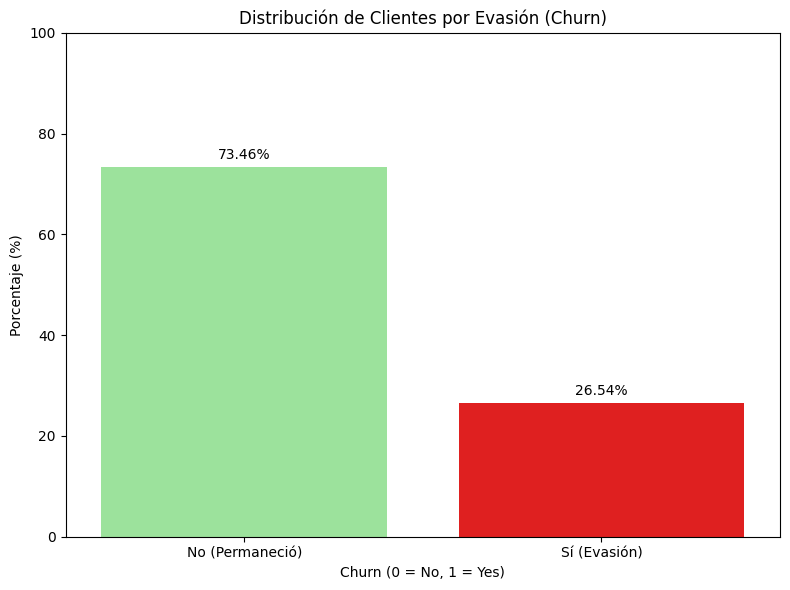

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos una paleta de colores personalizada: verde para 'No' (0) y rojo para 'Sí' (1)
custom_palette = {0: 'lightgreen', 1: 'red'}

# Creamos un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_percentages.index, y=churn_percentages.values, hue=churn_percentages.index, palette=custom_palette, legend=False)
plt.title('Distribución de Clientes por Evasión (Churn)')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Porcentaje (%)')
plt.xticks(ticks=[0, 1], labels=['No (Permaneció)', 'Sí (Evasión)'], rotation=0)
plt.ylim(0, 100) # Para asegurar que el eje y vaya de 0 a 100%

# Añadimos etiquetas de porcentaje en las barras
for index, value in enumerate(churn_percentages.values):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [286]:
# Calcula la proporción de clientes que evadieron (churn = 1) y los que no (churn = 0) para cada tipo de servicio de internet. 
churn_by_internet_service = pd.crosstab(df_normalized['internet_internetservice'], df_normalized['churn'], normalize='index') * 100
display(churn_by_internet_service.round(2))

churn,0,1
internet_internetservice,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


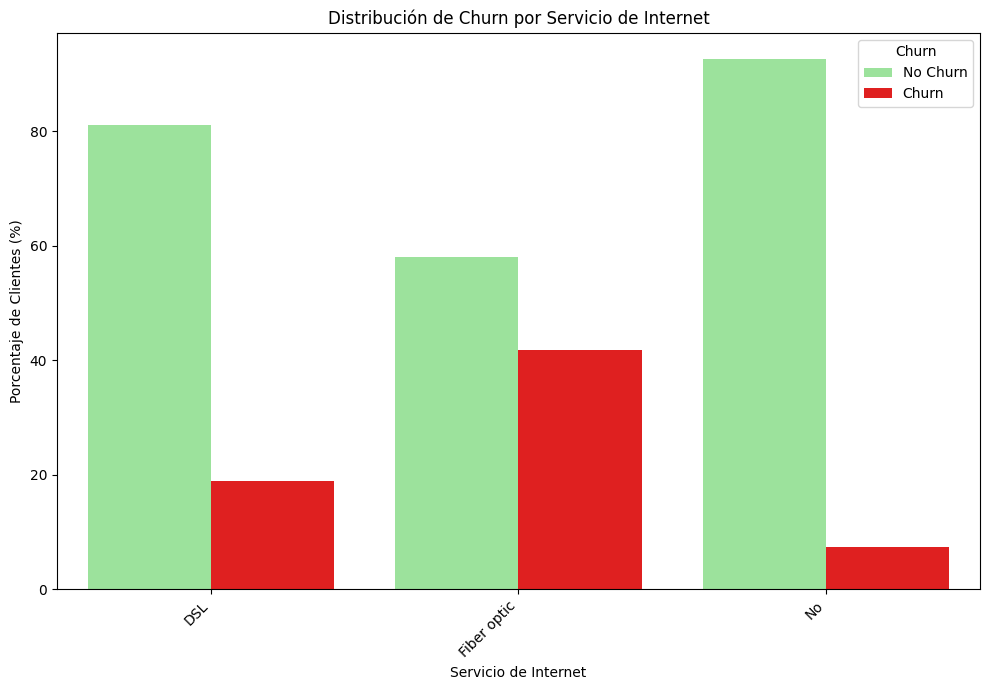

In [288]:
# Restablecer el índice para convertir 'internet_internetservice' en una columna para el trazado
churn_by_internet_service_df = churn_by_internet_service.reset_index()

# Cambiar el formato del DataFrame a largo para facilitar el trazado con seaborn
churn_long = churn_by_internet_service_df.melt(id_vars='internet_internetservice', var_name='churn', value_name='percentage')

# Crear el gráfico de barras y capturar el objeto Axes
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=churn_long, x='internet_internetservice', y='percentage', hue='churn', palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Churn por Servicio de Internet')
plt.xlabel('Servicio de Internet')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=45, ha='right')

# Obtener los manejadores (handles) y las etiquetas (labels) del objeto de leyenda de Seaborn
handles, labels = ax.get_legend_handles_labels()

# Definir las nuevas etiquetas de texto que quieres mostrar
# Asumimos que el orden de handles/labels corresponde a 0, 1 (No Churn, Churn)
new_labels_text = ['No Churn', 'Churn']

# Crear la leyenda con los manejadores existentes, las nuevas etiquetas y el color de texto en negro
ax.legend(handles=handles, labels=new_labels_text, title='Churn', labelcolor='black')

plt.tight_layout()
plt.show()

In [289]:
# Calcula la proporción de clientes que evadieron (churn = 1) y los que no (churn = 0) para cada tipo de contrato.
churn_by_contract = pd.crosstab(df_normalized['account_contract'], df_normalized['churn'], normalize='index') * 100
display(churn_by_contract.round(2))

churn,0,1
account_contract,,
Month-to-month,57.29,42.71
One year,88.73,11.27
Two year,97.17,2.83


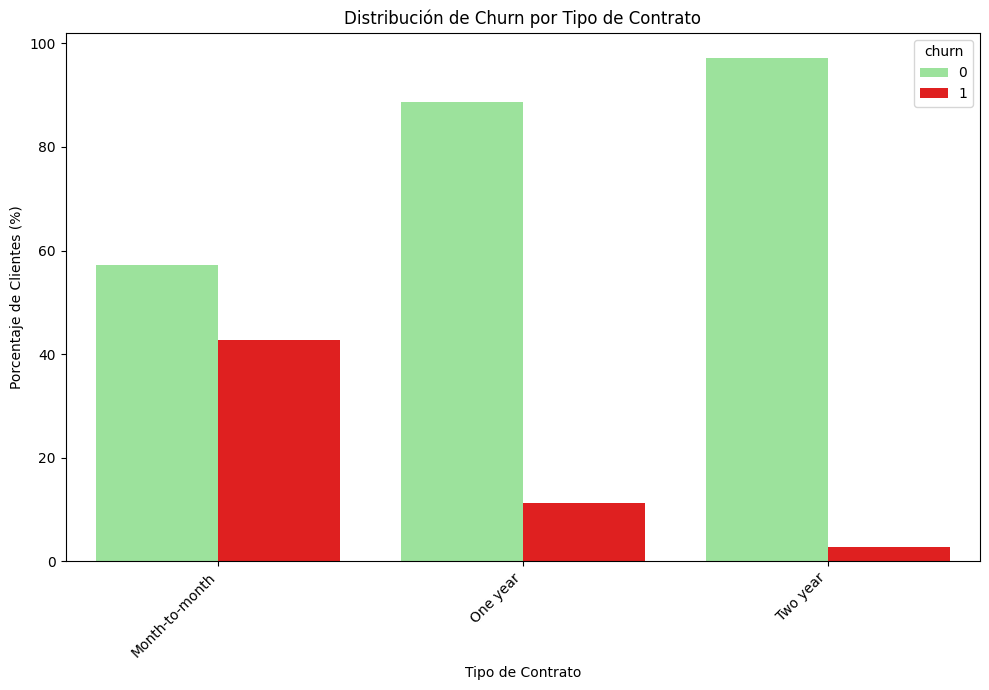

In [290]:
# Restablecer el índice para convertir 'account_contract' en una columna para el trazado
churn_by_contract_df = churn_by_contract.reset_index()

# Cambiar el formato del DataFrame a largo para facilitar el trazado con seaborn
churn_long_contract = churn_by_contract_df.melt(id_vars='account_contract', var_name='churn', value_name='percentage')

# Crear el gráfico de barras y capturar el objeto Axes
plt.figure(figsize=(10, 7))
sns.barplot(data=churn_long_contract, x='account_contract', y='percentage', hue='churn', palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=45, ha='right')

# Obtener los manejadores (handles) y las etiquetas (labels) del objeto de leyenda de Seaborn
handles, labels = ax.get_legend_handles_labels()

# Definir las nuevas etiquetas de texto que quieres mostrar
# Asumimos que el orden de handles/labels corresponde a 0, 1 (No Churn, Churn)
new_labels_text = ['No Churn', 'Churn']

# Crear la leyenda con los manejadores existentes, las nuevas etiquetas y el color de texto en negro
ax.legend(handles=handles, labels=new_labels_text, title='Churn', labelcolor='black')

plt.tight_layout()
plt.show()

In [291]:
# Calcula la proporción de clientes que evadieron (churn = 1) y los que no (churn = 0) para cada tipo de método de pago.
churn_by_payment_method = pd.crosstab(df_normalized['account_paymentmethod'], df_normalized['churn'], normalize='index') * 100
display(churn_by_payment_method.round(2))

churn,0,1
account_paymentmethod,,
Bank transfer (automatic),83.29,16.71
Credit card (automatic),84.76,15.24
Electronic check,54.71,45.29
Mailed check,80.89,19.11


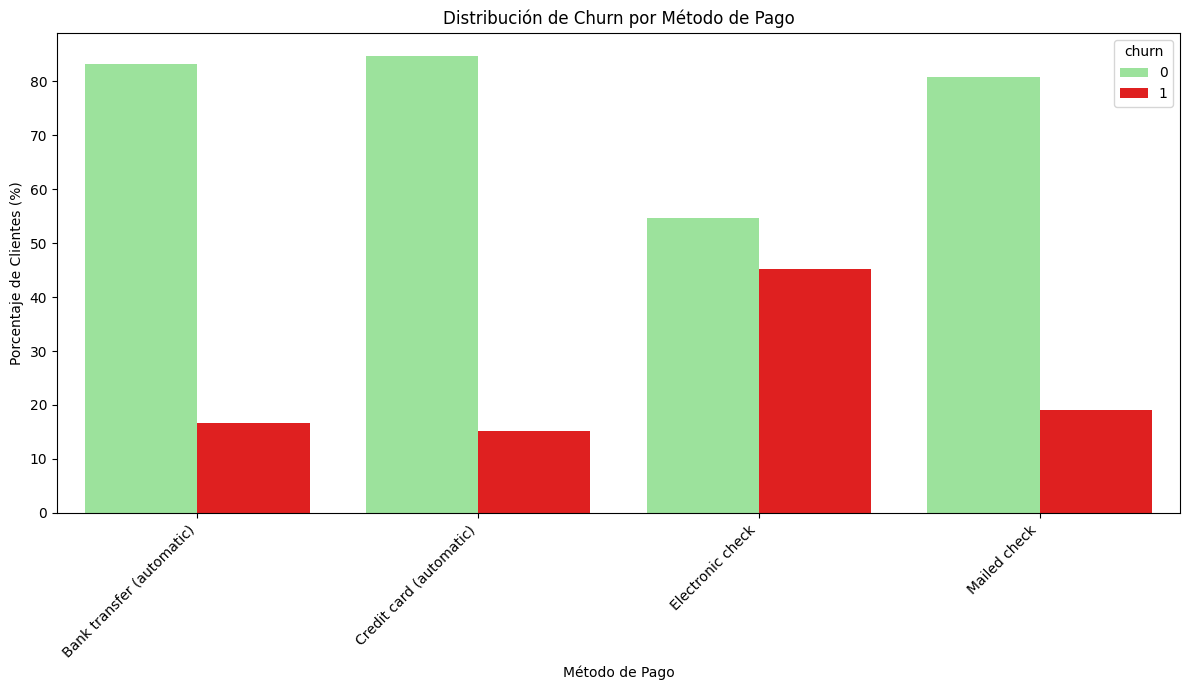

In [292]:
# Restablecer el índice para convertir 'account_paymentmethod' en una columna para el trazado
churn_by_payment_method_df = churn_by_payment_method.reset_index()

# Cambiar el formato del DataFrame a largo para facilitar el trazado con seaborn
churn_long_payment_method = churn_by_payment_method_df.melt(id_vars='account_paymentmethod', var_name='churn', value_name='percentage')

# Crear el gráfico de barras y capturar el objeto Axes
plt.figure(figsize=(12, 7))
sns.barplot(data=churn_long_payment_method, x='account_paymentmethod', y='percentage', hue='churn', palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Churn por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Porcentaje de Clientes (%)')
plt.xticks(rotation=45, ha='right')

# Obtener los manejadores (handles) y las etiquetas (labels) del objeto de leyenda de Seaborn
handles, labels = ax.get_legend_handles_labels()

# Definir las nuevas etiquetas de texto que quieres mostrar
# Asumimos que el orden de handles/labels corresponde a 0, 1 (No Churn, Churn)
new_labels_text = ['No Churn', 'Churn']

# Crear la leyenda con los manejadores existentes, las nuevas etiquetas y el color de texto en negro
ax.legend(handles=handles, labels=new_labels_text, title='Churn', labelcolor='black')

plt.tight_layout()
plt.show() 


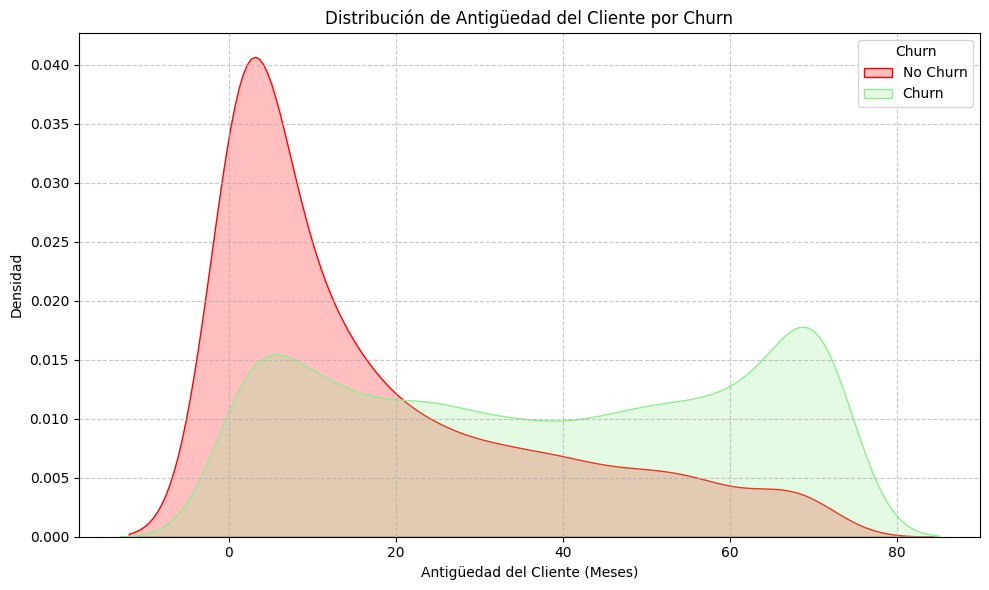

In [293]:
# Crear un gráfico KDE (Gráfico de Estimación de Densidad del Kernel) para la antigüedad del cliente, diferenciando por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='customer_tenure', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Antigüedad del Cliente por Churn')
plt.xlabel('Antigüedad del Cliente (Meses)')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

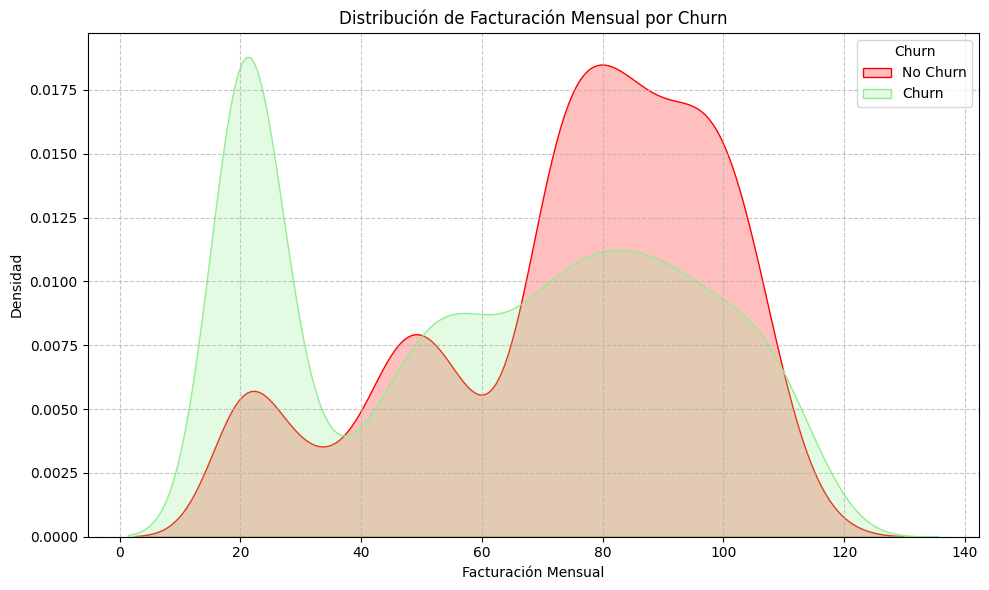

In [294]:
# Crear un gráfico KDE para account_charges_monthly, diferenciando por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='account_charges_monthly', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Facturación Mensual por Churn')
plt.xlabel('Facturación Mensual')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

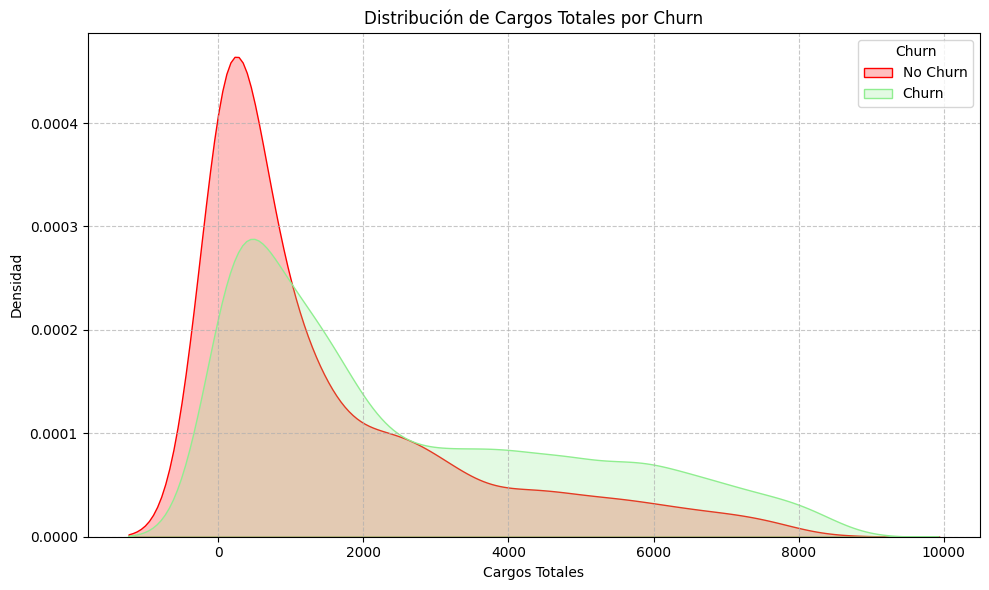

In [295]:
# Crear un gráfico KDE para account_charges_total, diferenciando por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='account_charges_total', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Cargos Totales')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

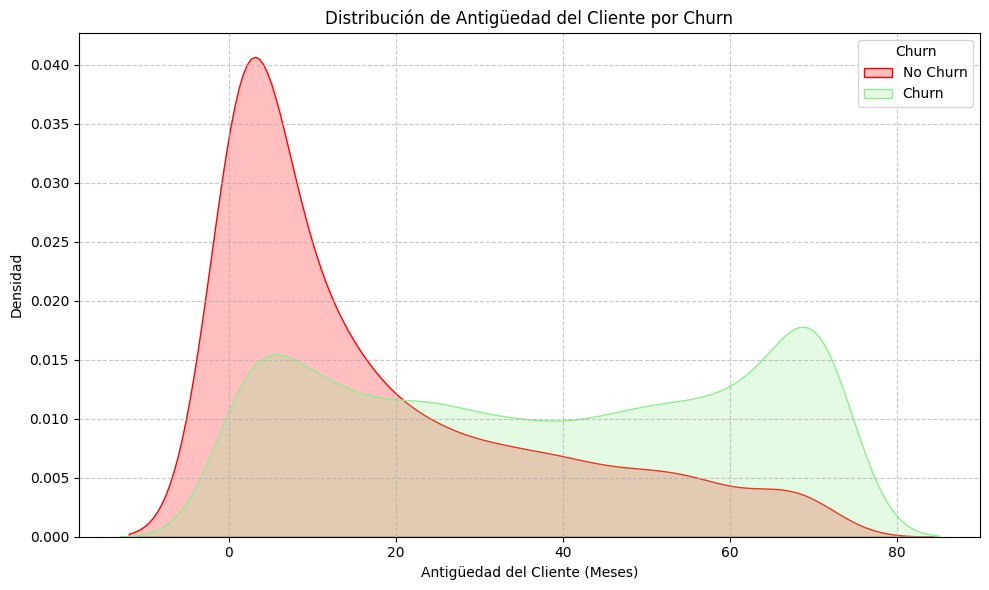

In [296]:
# Crear un gráfico KDE para customer_tenure, diferencianfo por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='customer_tenure', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Antigüedad del Cliente por Churn')
plt.xlabel('Antigüedad del Cliente (Meses)')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

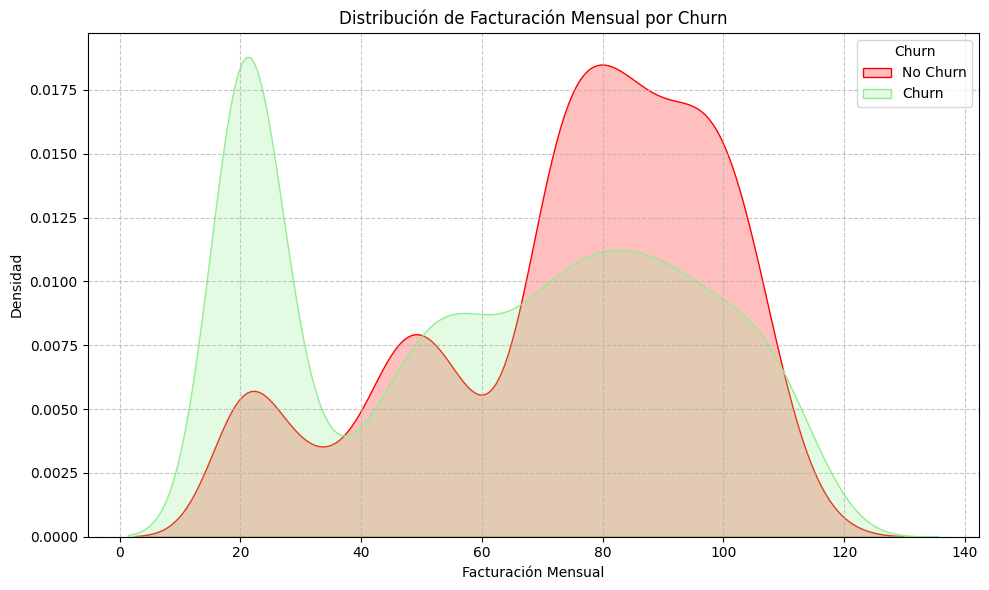

In [297]:
#  Crear un gráfico KDE para account_charges_monthly, diferenciando por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='account_charges_monthly', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Facturación Mensual por Churn')
plt.xlabel('Facturación Mensual')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

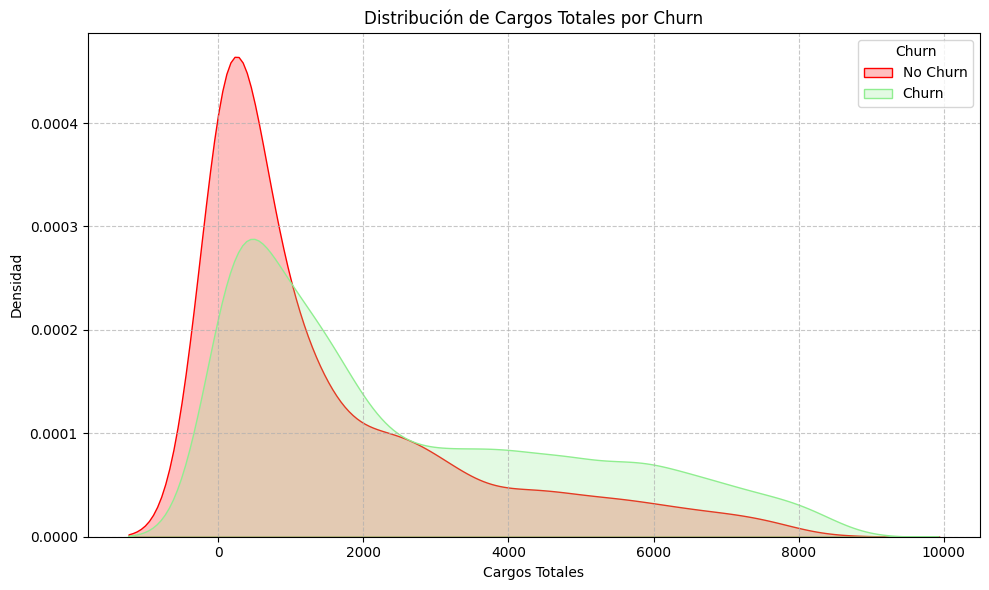

In [298]:
# Crear un gráfico KDE para account_charges_total, diferenciando por churn
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalized, x='account_charges_total', hue='churn', fill=True, common_norm=False, palette={0: 'lightgreen', 1: 'red'})

# Agrega título y etiquetas
plt.title('Distribución de Cargos Totales por Churn')
plt.xlabel('Cargos Totales')
plt.ylabel('Densidad')
plt.legend(title='Churn', labels=['No Churn', 'Churn'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#📄Informe final